<a href="https://colab.research.google.com/github/VendedeTudo/App/blob/main/11_Dados_em_Painel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montar Dados em Painel

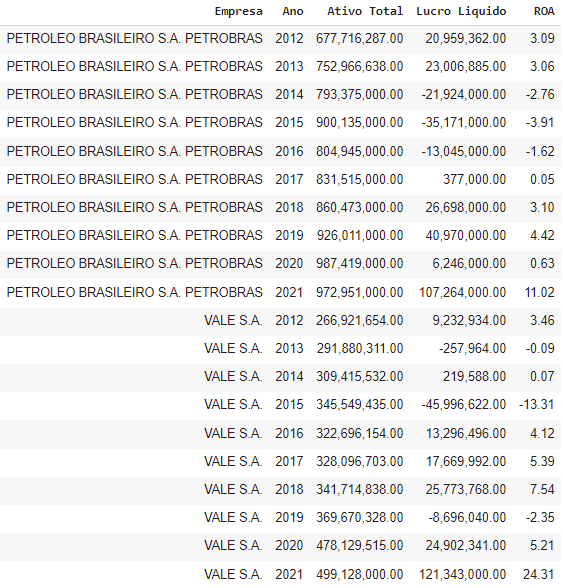

In [ ]:
import pandas as pd

# Definir a quantidade de linhas e colunas apresentadas no DF
pd.set_option("display.max_rows", 500)
pd.set_option('display.max_columns', 500)

# Definir formatação do float
pd.set_option('float_format','{:,.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pasta_drive = '/content/drive/MyDrive/MiniCurso - Python/Pratica/dados/'

In [ ]:
# Criar DataFrame com todas as informações do anos coletados
demonstracoes_anuais = pd.DataFrame()

# Realiza repetições dos códigos
for ano in range(2012,2022):
  # Leitura dos arquivos (.csv)
  bpa = pd.read_csv(pasta_drive+f'dfp_cia_aberta_BPA_con_{ano}.csv', sep=';', encoding='ISO-8859-9', decimal=',')

  # Filtrar apenas informações do ORDEM_EXERC == ÚLTIMO
  bpa = bpa[bpa['ORDEM_EXERC'] == 'ÚLTIMO']

  # Converter dados numéricos e data
  bpa['VL_CONTA'] = pd.to_numeric(bpa['VL_CONTA'])
  bpa['DT_REFER'] = pd.to_datetime(bpa['DT_REFER'])

  # Criar coluna ANO
  bpa['ANO'] = bpa['DT_REFER'].dt.year


  # Leitura dos arquivos (.csv)
  dre = pd.read_csv(pasta_drive+f'dfp_cia_aberta_DRE_con_{ano}.csv', sep=';', encoding='ISO-8859-9', decimal=',')

  # Filtrar apenas informações do ORDEM_EXERC == ÚLTIMO
  dre = dre[dre['ORDEM_EXERC'] == 'ÚLTIMO']

  # Converter dados numéricos e data
  dre['VL_CONTA'] = pd.to_numeric(dre['VL_CONTA'])
  dre['DT_REFER'] = pd.to_datetime(dre['DT_REFER'])

  # Criar coluna ANO
  dre['ANO'] = dre['DT_REFER'].dt.year

  # Agrupar por linha
  demonstracoes_anuais = pd.concat([demonstracoes_anuais,bpa])
  demonstracoes_anuais = pd.concat([demonstracoes_anuais,dre])

28712

15405

370840

In [ ]:
# Retorna dados únicos
demonstracoes_anuais['ANO'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
# Filtrar informações da conta ativos totais
ativo_total = demonstracoes_anuais[ demonstracoes_anuais['CD_CONTA'] == '1' ]

In [ ]:
# Filtrar informações da Vale
df_ativo = ativo_total[ativo_total['DENOM_CIA'] == 'VALE S.A.']

# Alterar a estrutura das linhas e colunas
df_ativo = df_ativo.pivot(index=['DENOM_CIA','ANO'], columns='DS_CONTA', values='VL_CONTA')
df_ativo

DS_CONTA          Ativo Total
DENOM_CIA ANO                
VALE S.A. 2012 266,921,654.00
          2013 291,880,311.00
          2014 309,415,532.00
          2015 345,549,435.00
          2016 322,696,154.00
          2017 328,096,703.00
          2018 341,714,838.00
          2019 369,670,328.00
          2020 478,129,515.00
          2021 499,128,000.00

In [ ]:
# Filtrar informações da conta Lucro/Prejuízo Consolidado do Período
lucro_liquido = demonstracoes_anuais[ demonstracoes_anuais['CD_CONTA'] == '3.09' ]
lucro_liquido.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,ANO,DT_INI_EXERC
65,00.000.000/0001-91,2012-12-31,4,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2012-12-31,3.09,Lucro/Prejuízo Consolidado do Período,"11,438,200.00",S,2012,2012-01-01
129,00.000.208/0001-00,2012-12-31,4,BRB BCO DE BRASILIA S.A.,14206,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2012-12-31,3.09,Lucro/Prejuízo Consolidado do Período,"195,644.00",S,2012,2012-01-01
237,00.001.180/0001-26,2012-12-31,3,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2012-12-31,3.09,Resultado Líquido das Operações Continuadas,"-6,925,652.00",S,2012,2012-01-01
299,00.070.698/0001-11,2012-12-31,2,CIA ENERGETICA DE BRASILIA,14451,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2012-12-31,3.09,Resultado Líquido das Operações Continuadas,"74,679.00",S,2012,2012-01-01
371,00.108.786/0001-65,2012-12-31,1,NET SERVIÇOS DE COMUNICAÇÃO S.A.,14621,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2012-12-31,3.09,Resultado Líquido das Operações Continuadas,"393,702.00",S,2012,2012-01-01


In [ ]:
# Filtrar informações da Vale
df_lucro = lucro_liquido[lucro_liquido['DENOM_CIA'] == 'VALE S.A.']

# Alterar a estrutura das linhas e colunas
df_lucro = df_lucro.pivot(index=['DENOM_CIA','ANO'], columns='DS_CONTA', values='VL_CONTA')
df_lucro

DS_CONTA        Resultado Líquido das Operações Continuadas
DENOM_CIA ANO                                              
VALE S.A. 2012                                 9,232,934.00
          2013                                  -254,362.00
          2014                                   219,588.00
          2015                               -45,996,622.00
          2016                                17,455,876.00
          2017                                20,277,581.00
          2018                                26,084,205.00
          2019                                -8,696,040.00
          2020                                24,902,341.00
          2021                               133,827,000.00

In [ ]:
# Agrupamento de colunas (utilizamos o axis=1)
df_vale = pd.concat([df_ativo,df_lucro], axis=1)
df_vale

DS_CONTA          Ativo Total  Resultado Líquido das Operações Continuadas
DENOM_CIA ANO                                                             
VALE S.A. 2012 266,921,654.00                                 9,232,934.00
          2013 291,880,311.00                                  -254,362.00
          2014 309,415,532.00                                   219,588.00
          2015 345,549,435.00                               -45,996,622.00
          2016 322,696,154.00                                17,455,876.00
          2017 328,096,703.00                                20,277,581.00
          2018 341,714,838.00                                26,084,205.00
          2019 369,670,328.00                                -8,696,040.00
          2020 478,129,515.00                                24,902,341.00
          2021 499,128,000.00                               133,827,000.00

In [ ]:
# DataFrame que agrupa as empresas
ativo = pd.DataFrame()

for empresa in ativo_total['DENOM_CIA'].unique():
  # Obter informações da empresa específica
  df_ = ativo_total[ ativo_total['DENOM_CIA'] == empresa]

  # Remover dados duplicados
  df_ = df_[~df_['ANO'].duplicated()]

  # Alterar a estrutura das linhas e colunas
  df_ = df_.pivot(index=['DENOM_CIA','ANO'], columns='DS_CONTA', values='VL_CONTA')

  ativo = pd.concat([ativo,df_])

ativo

DS_CONTA                                       Ativo Total
DENOM_CIA                            ANO                  
BCO BRASIL S.A.                      2012 1,136,007,475.00
                                     2013 1,162,167,882.00
                                     2014 1,278,136,948.00
                                     2015 1,388,864,529.00
                                     2016 1,387,215,686.00
...                                                    ...
RODOVIAS DO BRASIL HOLDING S.A.      2021     3,791,388.00
OMEGA ENERGIA S.A.                   2021    11,959,912.00
CLARANET TECHNOLOGY S.A.             2021       348,498.00
ALMEIDA JUNIOR SHOPPING CENTERS S.A. 2021     4,389,414.00
CONSERVAS ODERICH S.A.               2021       831,845.00

[3681 rows x 1 columns]

In [ ]:
# Lista de contas pesquisadas
# As contas incluídas na lista serão adicionadas ao painel
lista_contas = ['Ativo Total','Lucro/Prejuízo Consolidado do Período']
df_painel = pd.DataFrame()

for conta in lista_contas:
  # Obter DataFrame de deteminada conta (ativo, lucro..)
  contas = demonstracoes_anuais[demonstracoes_anuais['DS_CONTA'] == conta]
  df_conta = pd.DataFrame()
  for empresa in contas['DENOM_CIA'].unique():
    # Obter informações da empresa específica
    df_ = contas[ contas['DENOM_CIA'] == empresa]

    # Remover dados duplicados
    df_ = df_[~df_['ANO'].duplicated()]

    # Alterar a estrutura das linhas e colunas
    df_ = df_.pivot(index=['DENOM_CIA','ANO'], columns='DS_CONTA', values='VL_CONTA')

    df_conta = pd.concat([df_conta,df_])
  df_painel = pd.concat([df_painel,df_conta], axis=1)
df_painel

DS_CONTA                             Ativo Total  \
DENOM_CIA                     ANO                  
2W ENERGIA S.A.               2019    424,330.00   
                              2020    600,526.00   
3R PETROLEUM ÓLEO E GÁS S.A.  2019    396,444.00   
                              2020  2,109,064.00   
                              2021  5,453,481.00   
...                                          ...   
ÉVORA SA                      2014  2,666,496.00   
                              2015  4,030,772.00   
ÓLEO E GÁS PARTICIPAÇÕES S.A. 2012 17,116,348.00   
                              2013  5,389,639.00   
                              2014    128,302.00   

DS_CONTA                            Lucro/Prejuízo Consolidado do Período  
DENOM_CIA                     ANO                                          
2W ENERGIA S.A.               2019                              11,757.00  
                              2020                              55,064.00  
3R PETROLEUM ÓLEO E GÁS S.A.  2019                             -31,966.00  
                              2020                            -276,530.00  
                              2021                              15,991.00  
...                                                                   ...  
ÉVORA SA                      2014                              19,541.00  
                              2015                              10,583.00  
ÓLEO E GÁS PARTICIPAÇÕES S.A. 2012                          -1,172,774.00  
                              2013                         -17,430,479.00  
                              2014                           9,868,021.00  

[3682 rows x 2 columns]

In [ ]:
df_painel.reset_index(inplace=True)

In [ ]:
# Renomear colunas
df_painel.columns = ['Empresa','Ano','Ativo Total','Lucro Liquido']
df_painel['ROA'] = df_painel['Lucro Liquido'] / df_painel['Ativo Total'] * 100

# Alterar coluna específica
# df_painel.rename(columns={'Ativo Total':'Ativo Total (Milhares)'}, inplace=True)
df_painel

,Empresa,Ano,Ativo Total,Lucro Liquido,ROA
0,2W ENERGIA S.A.,2019,"424,330.00","11,757.00",2.77
1,2W ENERGIA S.A.,2020,"600,526.00","55,064.00",9.17
2,3R PETROLEUM ÓLEO E GÁS S.A.,2019,"396,444.00","-31,966.00",-8.06
3,3R PETROLEUM ÓLEO E GÁS S.A.,2020,"2,109,064.00","-276,530.00",-13.11
4,3R PETROLEUM ÓLEO E GÁS S.A.,2021,"5,453,481.00","15,991.00",0.29
...,...,...,...,...,...
3677,ÉVORA SA,2014,"2,666,496.00","19,541.00",0.73
3678,ÉVORA SA,2015,"4,030,772.00","10,583.00",0.26
3679,ÓLEO E GÁS PARTICIPAÇÕES S.A.,2012,"17,116,348.00","-1,172,774.00",-6.85
3680,ÓLEO E GÁS PARTICIPAÇÕES S.A.,2013,"5,389,639.00","-17,430,479.00",-323.41


In [ ]:
df_petr_vale = df_painel[ df_painel['Empresa'].isin(['PETROLEO BRASILEIRO S.A. PETROBRAS','VALE S.A.'])]
df_vale = df_painel[ df_painel['Empresa'].isin(['VALE S.A.'])]

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.line(df_petr_vale, x='Ano', y='ROA', color='Empresa')
grafico.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
grafico = go.Figure([
    # Criar gráfico de barras
    go.Bar(x=df_vale['Ano'],y=df_vale['Ativo Total'], name="Ativo Total"),

    # Criar gráfico de linhas
    go.Scatter(x=df_vale['Ano'],y=df_vale['Lucro Liquido'], name="Lucro Liquido")
])

# Incluir título
grafico.update_layout(title="Ativos Totais e Lucro Líquido")

grafico.show()

In [ ]:
df_filtro = df_painel[df_painel['Empresa'].isin(['PETROLEO BRASILEIRO S.A. PETROBRAS',
                                     'VALE S.A.','ITAU UNIBANCO HOLDING S.A.','BCO BRADESCO S.A.',
                                     'JBS S.A.','EMBRAER S.A.'])]
grafico = px.scatter(df_filtro, x='Lucro Liquido', y='ROA', color='Empresa')
grafico.show()

In [ ]:
grafico = px.scatter(df_filtro, x='Lucro Liquido', y='ROA', trendline='ols')
grafico.show()

In [ ]:
df_filtro[['Lucro Liquido','ROA','Ativo Total']].corr()

,Lucro Liquido,ROA,Ativo Total
Lucro Liquido,1.00,0.84,0.32
ROA,0.84,1.00,-0.00
Ativo Total,0.32,-0.00,1.00
